In [1]:
# Covid19 Analysis

# Our goal is to built a feature that represent a hospital overload.

In [2]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from haversine import haversine, Unit
from haversine import haversine_vector

In [3]:
# reading dataset
# https://opendatasus.saude.gov.br/dataset/bd-srag-2020

# reading dataset

df_2020 = pd.read_csv('/home/pedro/bkp/code/dataset/INFLUD-21-09-2020.csv',sep=';',encoding = "ISO-8859-1")

# Inputing constraint in the dataset 

# Positive case:

df_2020 = df_2020[df_2020['PCR_SARS2']==1]
print(df_2020.shape)


# Hospitalized people:

df_2020 = df_2020[df_2020['PCR_SARS2']==1][df_2020['HOSPITAL']==1][df_2020['NU_IDADE_N']<=110]
print(df_2020.shape)

# Hospitalized people with age small than 110:

df_2020 = df_2020[df_2020['PCR_SARS2']==1][df_2020['HOSPITAL']==1][df_2020['NU_IDADE_N']<=110][df_2020['EVOLUCAO'] != 3][df_2020['EVOLUCAO'] != 9][df_2020['EVOLUCAO'].notnull()]
print(df_2020.shape)


/home/pedro/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,60,62,63,64,92,94,108,117,121,123) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(299142, 154)


<ipython-input-3-b9d17c837b0e>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2020 = df_2020[df_2020['PCR_SARS2']==1][df_2020['HOSPITAL']==1][df_2020['NU_IDADE_N']<=110]


(279982, 154)


<ipython-input-3-b9d17c837b0e>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2020 = df_2020[df_2020['PCR_SARS2']==1][df_2020['HOSPITAL']==1][df_2020['NU_IDADE_N']<=110][df_2020['EVOLUCAO'] != 3][df_2020['EVOLUCAO'] != 9][df_2020['EVOLUCAO'].notnull()]


(242679, 154)


In [4]:
# Calculating the number of hospitalization for each hospital separated by epidemiological week

# CNES = hospital code 

In [5]:
# To build a dataframe

df_2020 = df_2020.groupby(['CO_UNI_NOT', 'SEM_NOT']).size().reset_index(name="Times")

# cheking
print(df_2020)

# size
print(df_2020.shape)

# Nan number
print(df_2020['CO_UNI_NOT'].isna().sum())

       CO_UNI_NOT  SEM_NOT  Times
0              19       19      2
1              19       20      2
2              19       21      3
3              19       22      1
4              19       23      2
...           ...      ...    ...
40490     9997091       30      4
40491     9997091       31      2
40492     9997091       32      2
40493     9997091       35      3
40494     9997091       36      1

[40495 rows x 3 columns]
(40495, 3)
0


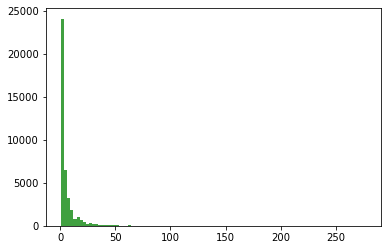

In [6]:
# Times distribution

plt.hist(df_2020['Times'], 100, density=False, facecolor='g', alpha=0.75)
plt.show()

In [7]:
# max value

print(df_2020['Times'].max())

# hospital code (hospital de campanha)
print(df_2020['CO_UNI_NOT'][df_2020['Times'] == 277])

277
2287    102083
Name: CO_UNI_NOT, dtype: int64


In [8]:
# reading dataset
# http://plataforma.saude.gov.br/coronavirus/dados-abertos/

# To analysing the hospitalization by SARS from 2019 to get a proxy of hospital absorption capacity.

df_2019 = pd.read_csv('/home/pedro/bkp/code/dataset/INFLUD19-16042020.csv',sep=';',encoding = "ISO-8859-1")


/home/pedro/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (97,105,107,132) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
# hospitalization for by hospital


# general data
print(df_2019.shape)

# Selecting hospitalized patients and code from hospital reporting unit.

df_2019 = df_2019['CO_UNI_NOT'][df_2019['HOSPITAL']==1]
print(df_2019.shape)

(48528, 138)
(47737,)


In [10]:
# Number of hospitalization in 2019 for each hospital reporting unit.

df_2019 = df_2019.value_counts().rename_axis('CO_UNI_NOT').to_frame('counts')
print(df_2019.shape)

(2605, 1)


In [11]:
# max value

print(df_2019['counts'].max())

1290


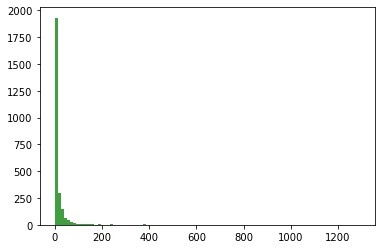

In [12]:
# Hospitalization by SARS distribution for 2019

plt.hist(df_2019['counts'], 100, density=False, facecolor='g', alpha=0.75) # .dropna(),
plt.show()

In [13]:
# Merging both dataset

df = pd.merge(df_2020, df_2019, on='CO_UNI_NOT', how="left")

print(df.shape)

(40495, 4)


In [14]:
# Nan number for each variable

print(df['Times'].isna().sum())
print(df['counts'].isna().sum())

0
12296


In [15]:
# To check
print(df['Times'].sum())

242679


In [16]:
# To defininf the Overcrowd feature

df['Overload'] = df['Times']/df['counts']

print(df['Overload'].isna().sum())

12296


In [17]:
# To building a catalog with reporting health unit, epidemiologic week, and Overcrowded features

df = df[['CO_UNI_NOT','SEM_NOT','Overload']]
print(df.shape)

(40495, 3)


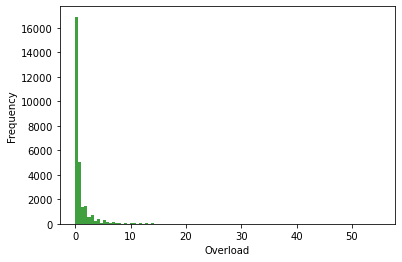

In [18]:
# the histogram of the data
plt.hist(df['Overload'], 100, density=False, facecolor='g', alpha=0.75) # .dropna(),
plt.xlabel('Overload')
plt.ylabel('Frequency')
plt.show()

In [19]:
# To transform in csv dataset

df.to_csv('hospital_overcrowded.csv',index=False)